# About dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

**About this file**

Information about dataset attributes -

- Pregnancies: To express the Number of pregnancies
- Glucose: To express the Glucose level in blood
- BloodPressure: To express the Blood pressure measurement
- SkinThickness: To express the thickness of the skin
- Insulin: To express the Insulin level in blood
- BMI: To express the Body mass index
- DiabetesPedigreeFunction: To express the Diabetes percentage
- Age: To express the age
- Outcome: To express the final result 1 is Yes and 0 is No

# EDA

In [1]:
# constants

LIGHT_GREEN = '#7bb078'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [3]:
df = pd.read_csv('./../data/Diabetes-Data.csv')

In [4]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(2768, 10)

In [6]:
df['Id'].nunique()

2768

There is only 1 record per person

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


**Observations:**

- There are no missing values
- All fields are numerical
- Id field is a unique identifier

In [8]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


**Observations**

- **Pregnancies**
    - The **average number of pregnancies** is around **4**, with a **maximum of 17**.
    - The **75th percentile** is **6 pregnancies**, indicating that 75% of the participants had 6 or fewer.
    - The **mean is slightly higher than the median**, suggesting the data is **right-skewed** — this can be confirmed further through plots.
    - **25% of women had only 1 pregnancy**, while **50% had up to 3**.

- **Glucose**
    - The **minimum glucose value is 0**, which is not physiologically plausible and indicates the presence of **outliers** / **missing value**.
    - The **mean and median are close**, suggesting no skewness and the data may become **symmetrical** once outliers are removed, further analysis is required.
    - **75% of the participants have glucose levels at or below 140 mg/dL**, which generally falls within the **non-diabetic range** per WHO standards.
    - However, the data does not specify whether the glucose measurement was taken while fasting or after a meal. It appears to be a single post-meal reading, but even if that’s the case, the exact time interval between the meal and the test is unknown — which is critical for accurate interpretation.
    - Additionally, diabetes is influenced by multiple factors such as **obesity, physical inactivity, insulin resistance, poor diet, family history, gestational diabetes, and fatty liver disease**, none of which are captured in this specific variable.

-  **Blood Pressure**
    - Similar to glucose, there are **minimum values of 0**, indicating **outliers** / **missing value**.
    - The **mean and median are nearly identical**, suggesting no skewness and the data may be **normally distributed** after outlier removal, further analysis is required.
    - The data doesn’t specify whether the measurement refers to **systolic or diastolic pressure**. However, since the **75th percentile is below 80 mmHg**, it likely represents **diastolic pressure**.

- **Insulin**
    - The **mean is significantly greater than the median**, indicating the distribution is **right-skewed**.
    - Over **50% of participants appear to have elevated insulin levels**, consistent with **hyperinsulinemia**.

- **BMI**
    - According to WHO classifications:
        - **BMI > 25** is overweight,
        - **> 30** is Class I obesity,
        - **> 35** is Class II obesity,
        - **> 40** is Class III (severe) obesity.
    - Only about **25% of participants fall within the healthy BMI range**; the rest are either overweight or obese.
    - A **minimum BMI value of 0** is an **outlier** / **missing value**.
    - The **mean is approximately equal to the median**, suggesting a **potential normal distribution**, but further analysis is needed to confirm.

- **Diabetes Pedigree Function (DPF)**
    - The **DPF** estimates the **likelihood of developing diabetes** based on **family history**.
    - A **DPF of 0** suggests **no known family history**, while values **above 1.2** are considered **high genetic risk**.
    - From the data, **high-risk individuals (DPF $ \leq $ 1.2) are relatively few**.

- **Age**
    - Participants span a wide **age range from 11 to 81 years**, indicating a **diverse age distribution**.

## Feature Engineering

In [9]:
import pandas as pd

# Assuming 'age' is your column with ages
bins = [0, 12, 19, 29, 39, 49, 64, 100]
labels = ["Child", "Teenager", "Young Adult", "Adult", "Middle Aged", "Senior Adult", "Elderly"]

# Create a new column with the binned age groups
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)


In [10]:
df['Age Category'].value_counts(normalize=True).mul(100).round(2)

Age Category
Young Adult     52.24
Adult           21.28
Middle Aged     15.46
Senior Adult     8.71
Elderly          2.31
Child            0.00
Teenager         0.00
Name: proportion, dtype: float64

In [11]:
bins = [0, 25, 30, 35, 40, float('inf')]
labels = [
    "Normal or Underweight",
    "Overweight",
    "Class I Obesity",
    "Class II Obesity",
    "Class III Obesity (Severe)"
]

# Create BMI category column
df['BMI Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=True, include_lowest=True)

In [12]:
df['BMI Category'].value_counts(normalize=True).mul(100).round(2)

BMI Category
Class I Obesity               28.58
Overweight                    23.77
Class II Obesity              19.08
Normal or Underweight         15.50
Class III Obesity (Severe)    13.08
Name: proportion, dtype: float64

In [13]:
bins = [0, 60, 80, 90, 120, float('inf')]
labels = ["Hypotension", "Normal", "Hypertension Stage 1", "Hypertension Stage 2", "Hypertensive Crisis"]

df['Blood Pressure Category'] = pd.cut(df['BloodPressure'], bins=bins, labels=labels, right=False, include_lowest=True)


In [14]:
df['Blood Pressure Category'].value_counts()

Blood Pressure Category
Normal                  1609
Hypertension Stage 1     521
Hypotension              431
Hypertension Stage 2     203
Hypertensive Crisis        4
Name: count, dtype: int64

## Univariate Analysis

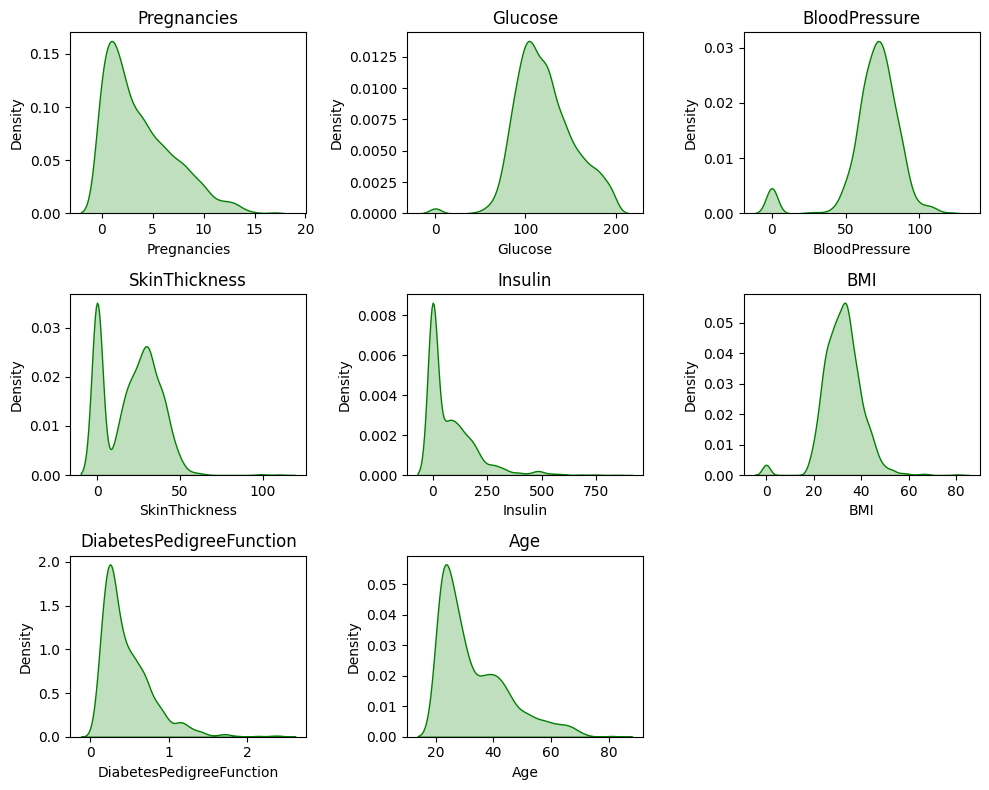

In [15]:
rows, cols = (3, 3)
plt.figure(figsize=(10, 8))

num_columns = df.select_dtypes(include=[np.number]).columns.tolist()

num_columns.remove('Outcome')
num_columns.remove('Id')

for i, col in enumerate(num_columns):
    plt.subplot(rows, cols, i+1)
    plt.title(col)
    sns.kdeplot(df[col], fill=True, color='g')

plt.tight_layout()
plt.show()

**Observation:**
- Some features like Glucose, Blood Pressure, BMI, and Skin Thickness have values of 0, which likely indicates missing data or potential outliers. We’ll need to decide how to handle these during model development.
- Insulin levels are also 0 for many patients. This could suggest that their pancreas isn’t producing enough insulin, which is often seen in type 1 diabetes. However, we should look into how many participants have insulin values at or near 0, and check whether those individuals are diagnosed with diabetes.
- Some participants had high insulin levels—around 100, 150, or even over 500. These individuals may have hyperinsulinemia (It deplends when was the test conducted after mean, was it immediate or after certain interval), which means there is too much insulin in the blood. This condition increases the risk of metabolic diseases and can lead to metabolic syndrome and type 2 diabetes. [Source - National Library of Medicine](https://pmc.ncbi.nlm.nih.gov/articles/PMC10186728/)


In [16]:
df.isna().sum().sum().item()

0

In [17]:
df.duplicated().sum().item()

0

**Observation:** There are no missing values and duplicate values

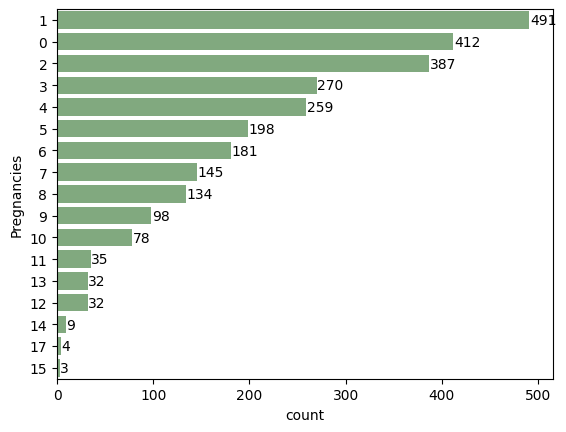

In [18]:
sns.countplot(y=df['Pregnancies'], order=df['Pregnancies'].value_counts().index, color=LIGHT_GREEN)

for p in plt.gca().patches:
    plt.text(p.get_width() + 0.5, p.get_y() + 0.6, str(round(p.get_width())), color='black')

plt.show()

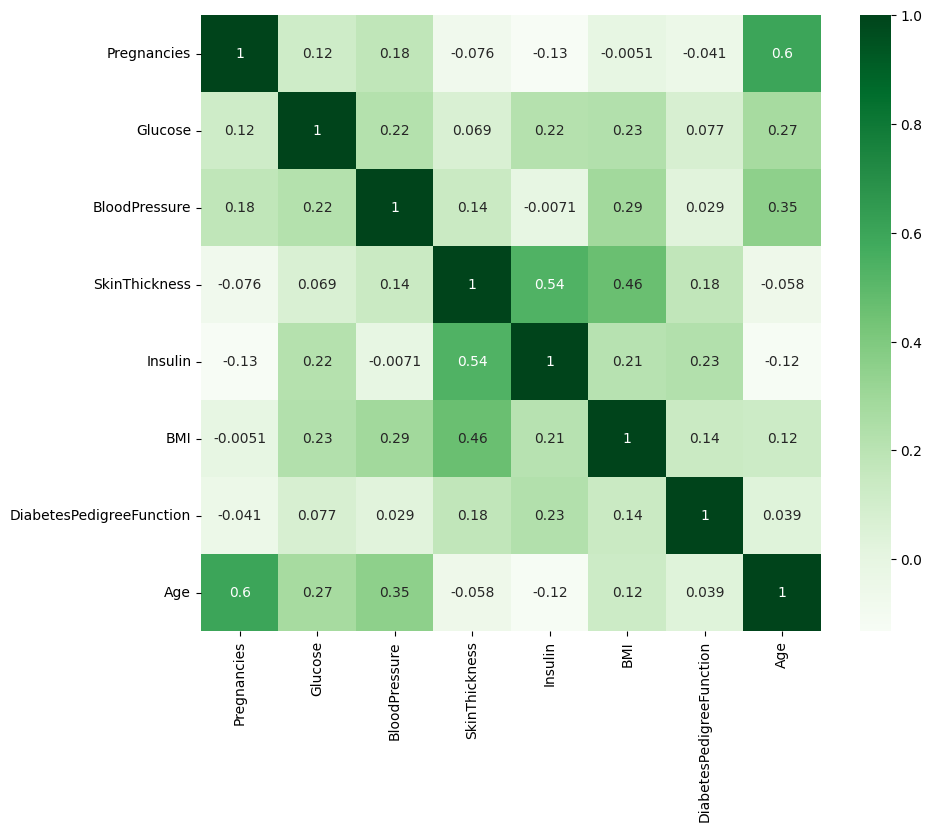

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_columns].corr(method='spearman'), annot=True, cmap='Greens')
plt.show()

**Observation:** There is no significant correlation observed among the variables. There is a 0.6% correlation between age and pregnancies.

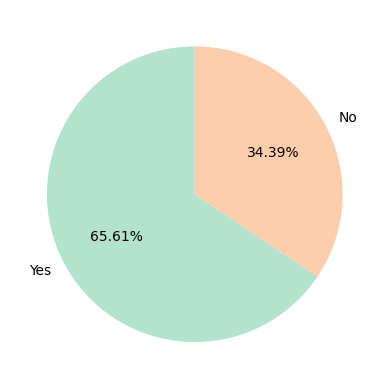

In [20]:
plt.pie(df['Outcome'].value_counts(), labels=['Yes', 'No'], autopct='%1.2f%%', colors=plt.get_cmap('Pastel2').colors, startangle=90)
plt.show()

**Observatoin:** 66% of the population has Diabetes

## Bivariate Analysis

In [21]:
df[df['Insulin'] <= 0].groupby('Outcome')['Outcome'].count()

Outcome
0    845
1    485
Name: Outcome, dtype: int64

In [22]:
df[df['Insulin'] == 0]['Outcome'].count().item()

1330

In [23]:
df[df['Insulin'] <= 3]['Outcome'].count().item()

1330

**Observation:** 

An insulin level of 0 $\mu\text{IU/mL}$ can be considered an outlier or a missing value, as physiologically undetectable insulin is extremely rare in non-diabetic individuals (In our data set we have 845 such entries where the patient is non-diabetic, but has insulin level 0). It should be handled accordingly during analysis.
Based on peer-reviewed studies and biomedical literature (e.g., PMC1204764), the normal fasting insulin range in healthy individuals is typically between 3 and 15 $\mu\text{IU/mL}$ (approximately 18 to 90 pmol/L), though this can vary slightly across populations and assay methods.

After a meal, insulin levels commonly rise to 30 to 60 $\mu\text{IU/mL}$, and in some cases may exceed 100 $\mu\text{IU/mL}$, depending on the glucose load and individual insulin sensitivity. This increase is a normal physiological response to nutrient intake.

[Source - National Library of Medicine](https://pmc.ncbi.nlm.nih.gov/articles/PMC1204764/?utm_source=chatgpt.com)

In [24]:

crosstab_proportions = pd.crosstab(index=df['Age Category'], 
                                   columns=df['Outcome'],
                                   normalize='index')

print(crosstab_proportions.mul(100).round(2))


Outcome           0      1
Age Category              
Young Adult   79.25  20.75
Adult         53.99  46.01
Middle Aged   44.16  55.84
Senior Adult  47.30  52.70
Elderly       76.56  23.44


**Observation:** As the age progress, the changes of getting diabetes also increases.

In [25]:

crosstab_proportions = pd.crosstab(index=df['Pregnancies'], 
                                   columns=df['Outcome'],
                                   normalize='index')

print(crosstab_proportions.mul(100).round(2))


Outcome          0       1
Pregnancies               
0            66.50   33.50
1            78.00   22.00
2            82.69   17.31
3            64.07   35.93
4            65.25   34.75
5            63.13   36.87
6            66.85   33.15
7            44.14   55.86
8            44.03   55.97
9            38.78   61.22
10           58.97   41.03
11           37.14   62.86
12           56.25   43.75
13           40.62   59.38
14            0.00  100.00
15            0.00  100.00
17            0.00  100.00


**Observation:** From previous observations, 75% of participants had six or fewer pregnancies. However, the risk of diabetes appears to increase with a higher number of pregnancies. For those with seven or more, the risk becomes more noticeable—and among participants with 14, 15, or 16 pregnancies, the chance of having diabetes was 100%.

In [26]:

crosstab_proportions = pd.crosstab(index=df['BMI Category'], 
                                   columns=df['Outcome'],
                                   normalize='index')

print(crosstab_proportions.mul(100).round(2))


Outcome                         0      1
BMI Category                            
Normal or Underweight       93.01   6.99
Overweight                  75.84  24.16
Class I Obesity             55.63  44.37
Class II Obesity            58.71  41.29
Class III Obesity (Severe)  46.41  53.59


**Observation:** The data clearly shows that the risk of developing diabetes increases as BMI goes up.

In [27]:

crosstab_proportions = pd.crosstab(index=df['Blood Pressure Category'], 
                                   columns=df['Outcome'],
                                   normalize='index')

print(crosstab_proportions.mul(100).round(2))


Outcome                       0      1
Blood Pressure Category               
Hypotension               74.71  25.29
Normal                    67.50  32.50
Hypertension Stage 1      57.39  42.61
Hypertension Stage 2      51.72  48.28
Hypertensive Crisis      100.00   0.00


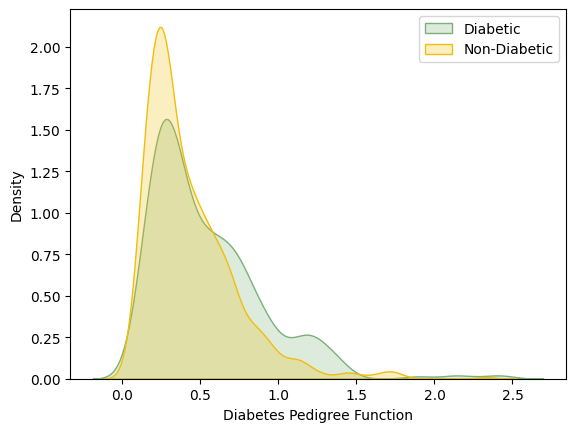

In [28]:
sns.kdeplot(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'], fill=True, color=LIGHT_GREEN)
sns.kdeplot(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'], fill=True, color="#F0BE0B")

plt.xlabel('Diabetes Pedigree Function')

plt.legend(labels=['Diabetic', 'Non-Diabetic'])
plt.show()

**Observations:**
- Non-Diabetic group has a sharper, higher peak around 0.2–0.3, meaning most non-diabetics have low Diabetes Pedigree Function values.
- The Diabetic group shows a wider spread (longer right tail), with some individuals having much higher values of Diabetes Pedigree Function.
- There is significant overlap between the two curves, especially below 0.6, meaning this feature alone doesn’t perfectly separate the two groups.

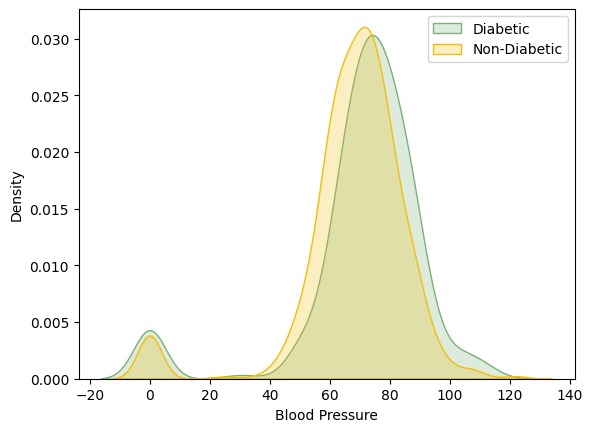

In [29]:
sns.kdeplot(df[df['Outcome'] == 1]['BloodPressure'], fill=True, color=LIGHT_GREEN)
sns.kdeplot(df[df['Outcome'] == 0]['BloodPressure'], fill=True, color="#F0BE0B")

plt.xlabel('Blood Pressure')

plt.legend(labels=['Diabetic', 'Non-Diabetic'])
plt.show()

**Observation:** Similar to the Diabetes Pedigree Function, Blood Pressure shows significant overlap between diabetic and non-diabetic participants. This variable alone is not sufficient to explain the outcome.

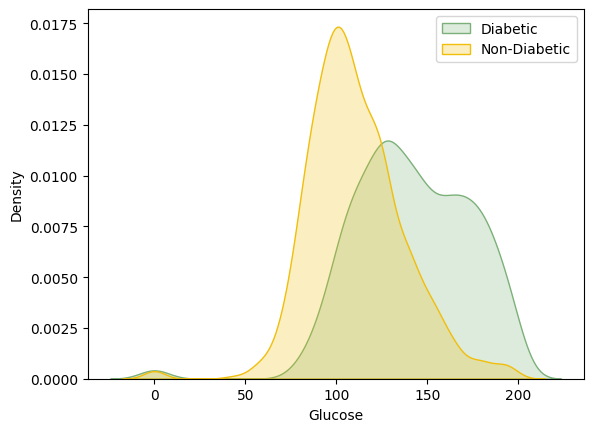

In [30]:
sns.kdeplot(df[df['Outcome'] == 1]['Glucose'], fill=True, color=LIGHT_GREEN)
sns.kdeplot(df[df['Outcome'] == 0]['Glucose'], fill=True, color="#F0BE0B")

plt.xlabel('Glucose')

plt.legend(labels=['Diabetic', 'Non-Diabetic'])
plt.show()

**Observations:**
- The Diabetic group tends to have higher glucose levels, with the peak density occurring around 140–160.
- The Non-Diabetic group peaks at a lower glucose level, around 100–110.
- There is less overlap between the two distributions compared to other features like Blood Pressure or Diabetes Pedigree Function.
- Although there is some overlap, it is relatively small suggesting Glucose is a strong predictor for diabetes in this dataset.

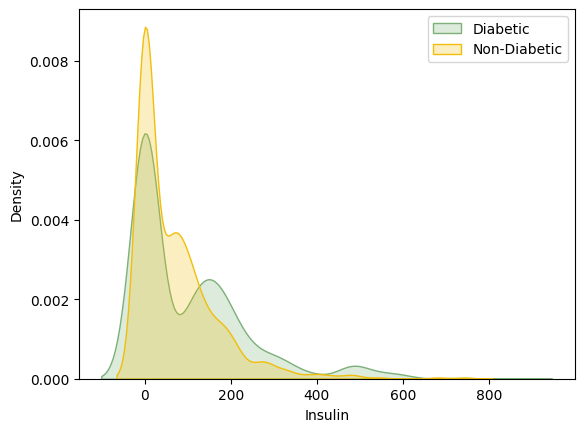

In [31]:
sns.kdeplot(df[df['Outcome'] == 1]['Insulin'], fill=True, color=LIGHT_GREEN)
sns.kdeplot(df[df['Outcome'] == 0]['Insulin'], fill=True, color="#F0BE0B")

plt.xlabel('Insulin')

plt.legend(labels=['Diabetic', 'Non-Diabetic'])
plt.show()

**Observations:**
- The peak at zero can be ignored as it represents missing value, we know from our analysis earlier that the normal insulin level start from 3 $\mu\text{IU/mL}$
- Although there is some overlap between the two distributions, a noticeable difference exists between the groups—the peaks occur at different values. This suggests that, when combined with other features, this parameter could contribute meaningfully to distinguishing diabetic participants from non-diabetic ones.

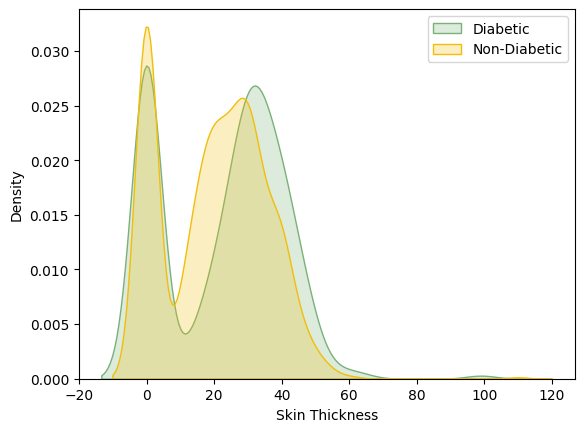

In [32]:
sns.kdeplot(df[df['Outcome'] == 1]['SkinThickness'], fill=True, color=LIGHT_GREEN)
sns.kdeplot(df[df['Outcome'] == 0]['SkinThickness'], fill=True, color="#F0BE0B")

plt.xlabel('Skin Thickness')

plt.legend(labels=['Diabetic', 'Non-Diabetic'])
plt.show()

**Observations:**

- The peak at zero can be disregarded, as it represents missing values.
- There is considerable overlap in skin thickness between diabetic and non-diabetic groups, this parameter alone is not sufficient to differentiate between the two, however it may be helpful when combined with other variable to make prediction. We can further perform hypothesis testing to compare the mean / median of both the groups

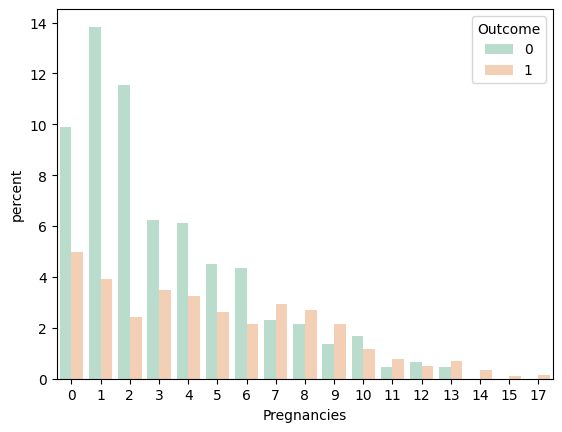

In [33]:
sns.countplot(data=df, x='Pregnancies', hue='Outcome', palette=plt.get_cmap('Pastel2').colors, stat='percent')
plt.show()

**Observation:** The likelihood of developing diabetes increases with the number of pregnancies, this confirms our analysis earlier.

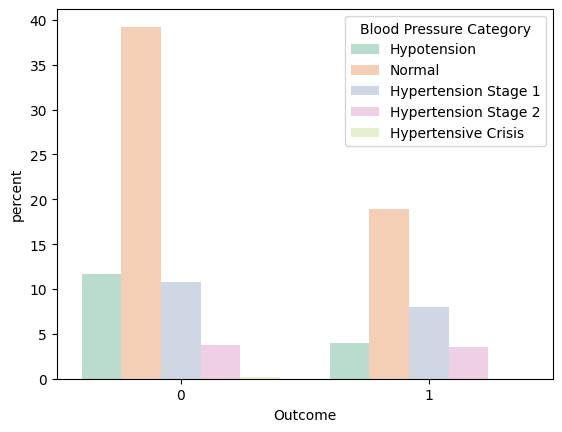

In [34]:
sns.countplot(data=df, x='Outcome', hue='Blood Pressure Category', palette=plt.get_cmap('Pastel2').colors, stat='percent')
plt.show()

**Observation:** Blood pressure by itself is not a sufficient indicator for determining whether a participant has diabetes.

### Calculate Probability of being diabetic / non-diabetic given a condition

In [35]:
def probability_of_outcome_given_param(data, param_name, param_value, outcome):
  """
  Calculate the probability of an outcome given the parameter.

  Args:
    data: The dataset.
    param_name: The name of the parameter.
    param_value: The value of the parameter.
    outcome: The outcome (0 or 1).

  Returns: Probability of the outcome given the parameter.

  """
  # Get the subset
  subset = data[(data[param_name] == param_value)]
  
  if subset.empty:
    return 0.0
  
  subset_outcome = data[data['Outcome'] == outcome]

  # Calculate prior
  prior = subset_outcome.shape[0] / data.shape[0]

  # Calculate likelihood
  likelihood = subset_outcome[subset_outcome[param_name] == param_value].shape[0] / subset_outcome.shape[0]

  # Calculate Marginal
  marginal = subset.shape[0] / data.shape[0]

  # Calculate Posterior
  posterior = prior * likelihood / marginal

  return posterior

In [36]:
for pregnancy in df['Pregnancies'].sort_values().unique():
  print(f'P(Diabetic | Pregnancy = {pregnancy}) = {probability_of_outcome_given_param(df, "Pregnancies", pregnancy, 1):.2f}')
  print(f'P(Not Diabetic | Pregnancy = {pregnancy}) = {probability_of_outcome_given_param(df, "Pregnancies", pregnancy, 0):.2f}')
  print('')

P(Diabetic | Pregnancy = 0) = 0.33
P(Not Diabetic | Pregnancy = 0) = 0.67

P(Diabetic | Pregnancy = 1) = 0.22
P(Not Diabetic | Pregnancy = 1) = 0.78

P(Diabetic | Pregnancy = 2) = 0.17
P(Not Diabetic | Pregnancy = 2) = 0.83

P(Diabetic | Pregnancy = 3) = 0.36
P(Not Diabetic | Pregnancy = 3) = 0.64

P(Diabetic | Pregnancy = 4) = 0.35
P(Not Diabetic | Pregnancy = 4) = 0.65

P(Diabetic | Pregnancy = 5) = 0.37
P(Not Diabetic | Pregnancy = 5) = 0.63

P(Diabetic | Pregnancy = 6) = 0.33
P(Not Diabetic | Pregnancy = 6) = 0.67

P(Diabetic | Pregnancy = 7) = 0.56
P(Not Diabetic | Pregnancy = 7) = 0.44

P(Diabetic | Pregnancy = 8) = 0.56
P(Not Diabetic | Pregnancy = 8) = 0.44

P(Diabetic | Pregnancy = 9) = 0.61
P(Not Diabetic | Pregnancy = 9) = 0.39

P(Diabetic | Pregnancy = 10) = 0.41
P(Not Diabetic | Pregnancy = 10) = 0.59

P(Diabetic | Pregnancy = 11) = 0.63
P(Not Diabetic | Pregnancy = 11) = 0.37

P(Diabetic | Pregnancy = 12) = 0.44
P(Not Diabetic | Pregnancy = 12) = 0.56

P(Diabetic | Pregna

**Observations:**
- Females with 0 to 6 pregnancies has less changes of getting diabetes
- If a female has 14, 15 or 17 pregnancies, she will be diabetic and her changes of diabetic is high

In [37]:
categories = ['Hypotension', 'Normal', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']
for category in categories:
  print(f'P(Diabetic | Blood Pressure is "{category}") = {probability_of_outcome_given_param(df, "Blood Pressure Category", category, 1):.2f}')
  print(f'P(Not Diabetic | Blood Pressure is "{category}") = {probability_of_outcome_given_param(df, "Blood Pressure Category", category, 0):.2f}')
  print('')

P(Diabetic | Blood Pressure is "Hypotension") = 0.25
P(Not Diabetic | Blood Pressure is "Hypotension") = 0.75

P(Diabetic | Blood Pressure is "Normal") = 0.33
P(Not Diabetic | Blood Pressure is "Normal") = 0.67

P(Diabetic | Blood Pressure is "Hypertension Stage 1") = 0.43
P(Not Diabetic | Blood Pressure is "Hypertension Stage 1") = 0.57

P(Diabetic | Blood Pressure is "Hypertension Stage 2") = 0.48
P(Not Diabetic | Blood Pressure is "Hypertension Stage 2") = 0.52

P(Diabetic | Blood Pressure is "Hypertensive Crisis") = 0.00
P(Not Diabetic | Blood Pressure is "Hypertensive Crisis") = 1.00



**Observations:**
- The probability of being diabetic generally increases as blood pressure moves from "Hypotension" (low blood pressure) to "Hypertension Stage 2 (High blood pressure)."
- Interestingly, in the "Hypertensive Crisis" category, the probability of being diabetic is 0.00. This may be due to having only 4 data points in this category. With more data points, we could make a more accurate prediction.

In [38]:
mask = (df['Pregnancies'] == 14) | (df['Pregnancies'] == 15) | (df['Pregnancies'] == 17)
df[mask]['Blood Pressure Category'].value_counts().reset_index()

,Blood Pressure Category,count
0,Normal,16
1,Hypotension,0
2,Hypertension Stage 1,0
3,Hypertension Stage 2,0
4,Hypertensive Crisis,0


**Observation:** 
- Females with 14, 15 or 17 pregnancies who has probability of being diabetic 1 has normal blood pressure
- Our overall analysis shows that diabetic patients do not necessarily have high blood pressure issues.

## Hypothesis testing

In [39]:
def check_normality(data, alpha=0.05):
    _, p_value = stats.shapiro(data)

    if p_value > alpha:
        print(f'Data is normally distributed! \nP-value = {p_value:.4f}') # Failed to reject null hypothesis
    else:
        print(f'Data is not normally distributed! \nP-value = {p_value:.4f}') # Reject Null hypothesis
        
    # Plot QQ Plot
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("Q-Q Plot for Normality")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()


### Does patient with diabetes has higher glocose level?

Data is not normally distributed! 
P-value = 0.0000


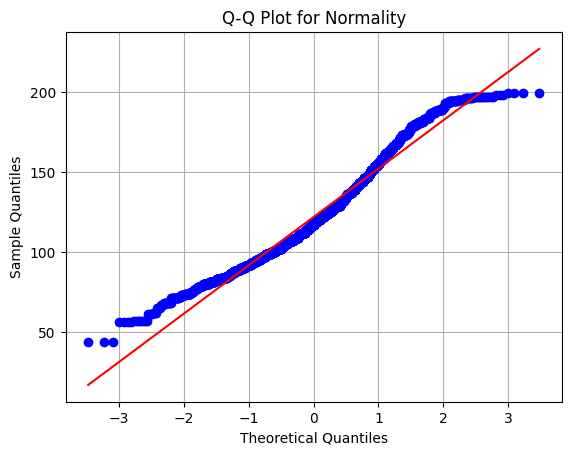

In [40]:
check_normality(df[df['Glucose'] > 0]['Glucose'])

Since the data is not mormally distributed, we can perform a non-parametric test to compare the median of one group is similar or different than other group.

In [41]:
group1 = df[(df['Glucose'] > 0) & (df['Outcome'] == 1)]['Glucose']
group2 = df[(df['Glucose'] > 0) & (df['Outcome'] == 0)]['Glucose']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='greater')

if p_value < 0.05:
    print("There is significant evidence that diabetic participants have higher glucose levels.") # Reject Null hypothesis
else:
    print("No significant evidence that diabetic participants have higher glucose levels.") # Failed to reject Null hypothesis


There is significant evidence that diabetic participants have higher glucose levels.


### Does patient with diabetes has higher blood pressure

Data is not normally distributed! 
P-value = 0.0000


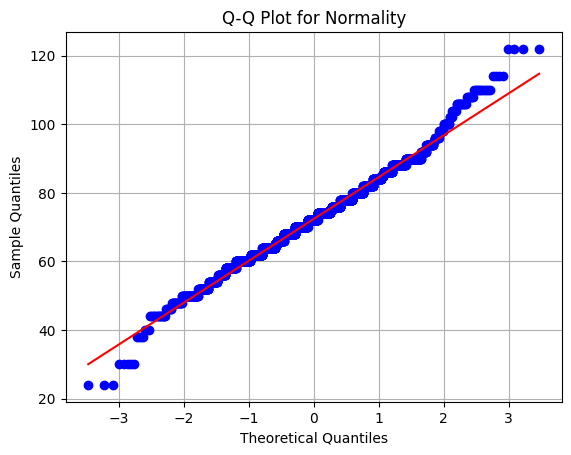

In [42]:
check_normality(df[df['BloodPressure'] > 0]['BloodPressure'])

In [43]:
group1 = df[(df['BloodPressure'] > 0) & (df['Outcome'] == 1)]['BloodPressure']
group2 = df[(df['BloodPressure'] > 0) & (df['Outcome'] == 0)]['BloodPressure']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

if p_value < 0.05:
    print("There is a significant difference in blood pressure between diabetic and non-diabetic participants.")  # Reject Null Hypothesis
else:
    print("No significant difference in blood pressure between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


There is a significant difference in blood pressure between diabetic and non-diabetic participants.


In [44]:
group1 = df[(df['BloodPressure'] > 0) & (df['Outcome'] == 1)]['BloodPressure']
group2 = df[(df['BloodPressure'] > 0) & (df['Outcome'] == 0)]['BloodPressure']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='greater')

if p_value < 0.05:
    print("There is a significant evidence that diabetic patients have higher blood pressure.")  # Reject Null Hypothesis
else:
    print("No significant evidence that diabetic patients have higher blood pressure.")  # Fail to reject Null Hypothesis


There is a significant evidence that diabetic patients have higher blood pressure.


### Is the mean / median of skin thickness of the diabetic patient is different or same?

Data is not normally distributed! 
P-value = 0.0000


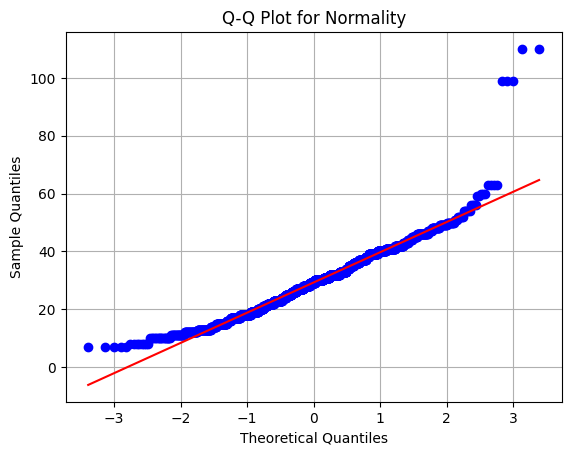

In [45]:
check_normality(df[df['SkinThickness'] > 0]['SkinThickness'])

In [46]:
group1 = df[(df['SkinThickness'] > 0) & (df['Outcome'] == 1)]['SkinThickness']
group2 = df[(df['SkinThickness'] > 0) & (df['Outcome'] == 0)]['SkinThickness']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

if p_value < 0.05:
    print("There is a significant difference in Skin Thickness between diabetic and non-diabetic participants.")  # Reject Null Hypothesis
else:
    print("No significant difference in Skin Thickness between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


There is a significant difference in Skin Thickness between diabetic and non-diabetic participants.


### Is there a difference between the insulin level of diabetic and non-diabetic patients

From our analysis earlier, we found out that a normal insulin level start with 3 $\mu\text{IU/mL}$

Data is not normally distributed! 
P-value = 0.0000


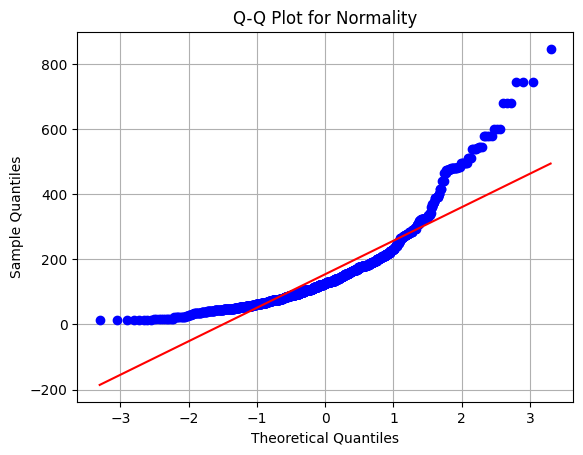

In [47]:
check_normality(df[df['Insulin'] >= 3]['Insulin'])

In [48]:
group1 = df[(df['Insulin'] >= 3) & (df['Outcome'] == 1)]['Insulin']
group2 = df[(df['Insulin'] >= 3) & (df['Outcome'] == 0)]['Insulin']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

if p_value < 0.05:
    print("There is a significant difference in the median Insulin between diabetic and non-diabetic participants.")  # Reject Null Hypothesis
else:
    print("No significant difference in the median Insulin between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


There is a significant difference in the median Insulin between diabetic and non-diabetic participants.


In [49]:
group1 = df[(df['Insulin'] >= 3) & (df['Outcome'] == 1)]['Insulin']
group2 = df[(df['Insulin'] >= 3) & (df['Outcome'] == 0)]['Insulin']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='less')

if p_value < 0.05:
    print("There is a significant evidence that diabetic patients have lower insulin level.")  # Reject Null Hypothesis
else:
    print("No significant difference in the median Insulin between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


No significant difference in the median Insulin between diabetic and non-diabetic participants.


In [50]:
group1 = df[(df['Insulin'] >= 3) & (df['Outcome'] == 1)]['Insulin']
group2 = df[(df['Insulin'] >= 3) & (df['Outcome'] == 0)]['Insulin']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='greater')

if p_value < 0.05:
    print("There is a significant evidence that diabetic patients have higher insulin level.")  # Reject Null Hypothesis
else:
    print("No significant difference in the median Insulin between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


There is a significant evidence that diabetic patients have higher insulin level.


### Is there a difference between the BMI of diabetic and non-diabetic patients

Data is not normally distributed! 
P-value = 0.0000


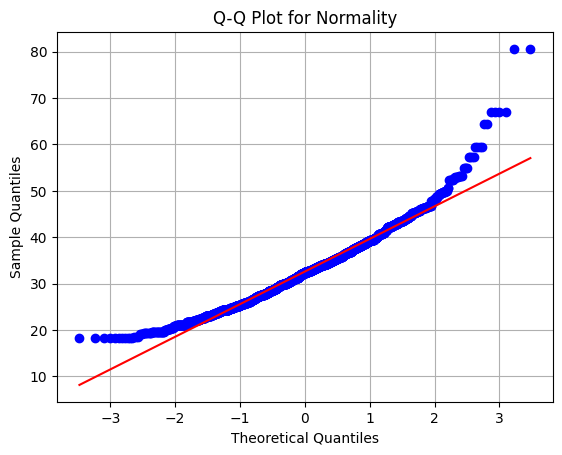

In [51]:
check_normality(df[df['BMI'] > 0]['BMI'])

In [52]:
group1 = df[(df['BMI'] > 0) & (df['Outcome'] == 1)]['BMI']
group2 = df[(df['BMI'] > 0) & (df['Outcome'] == 0)]['BMI']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

if p_value < 0.05:
    print("There is a significant difference in BMI between diabetic and non-diabetic participants.")  # Reject Null Hypothesis
else:
    print("No significant difference in BMI between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


There is a significant difference in BMI between diabetic and non-diabetic participants.


In [53]:
group1 = df[(df['BMI'] > 0) & (df['Outcome'] == 1)]['BMI']
group2 = df[(df['BMI'] > 0) & (df['Outcome'] == 0)]['BMI']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='less')

if p_value < 0.05:
    print("There is a significant evidence that diabetic patients have less BMI.")  # Reject Null Hypothesis
else:
    print("No significant difference in BMI between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


No significant difference in BMI between diabetic and non-diabetic participants.


In [54]:
group1 = df[(df['BMI'] > 0) & (df['Outcome'] == 1)]['BMI']
group2 = df[(df['BMI'] > 0) & (df['Outcome'] == 0)]['BMI']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='greater')

if p_value < 0.05:
    print("There is a significant evidence that diabetic patients have more BMI.")  # Reject Null Hypothesis
else:
    print("No significant difference in BMI between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


There is a significant evidence that diabetic patients have more BMI.


### Is there a difference between the Diabetes Pedigree Function of diabetic and non-diabetic patient?

Data is not normally distributed! 
P-value = 0.0000


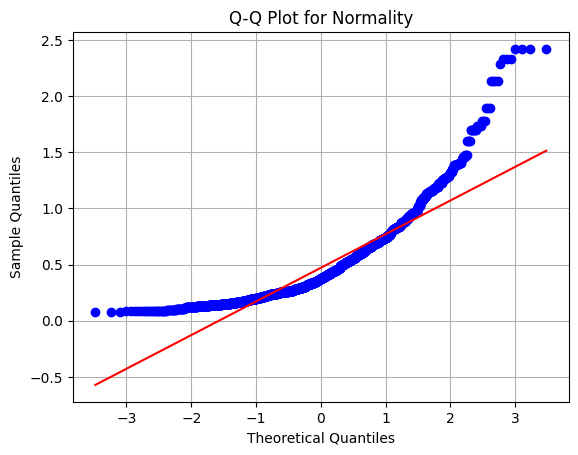

In [55]:
check_normality(df['DiabetesPedigreeFunction'])

In [56]:
group1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction']
group2 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

if p_value < 0.05:
    print("There is a significant difference in DPF between diabetic and non-diabetic participants.")  # Reject Null Hypothesis
else:
    print("No significant difference in DPF between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


There is a significant difference in DPF between diabetic and non-diabetic participants.


In [57]:
group1 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction']
group2 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction']

_, p_value = stats.mannwhitneyu(group1, group2, alternative='greater')

if p_value < 0.05:
    print("There is a significant evidence that diabetic patients have more DPK.")  # Reject Null Hypothesis
else:
    print("No significant difference in DPF between diabetic and non-diabetic participants.")  # Fail to reject Null Hypothesis


There is a significant evidence that diabetic patients have more DPK.


# Insights

- Several features (Glucose, Blood Pressure, BMI, Skin Thickness, Insulin) contain zero values, suggesting missing or incorrectly recorded data.
- Diabetic participants have significantly higher glucose levels, with clear separation from non-diabetics.
- Glocose is the strongest predictor in this dataset. Diabetics cluster around higher glucose levels (140–160), while non-diabetics peak around 100–110.
- Insulin shows extreme values, with many zeros (likely missing) and some very high outliers (>500 µIU/mL), both of which distort distributions.
- 845 non-diabetic participants have insulin = 0, suggesting these are likely missing values.
- Among valid Insulin values, diabetic participants tend to have higher insulin, consistent with hyperinsulinemia.
- Most participants had 0–6 pregnancies, with diabetes risk rising notably after 7. At extremely high counts (14, 15, 17), the probability of being diabetic is 100%.
- Risk of diabetes rises with age, consistent with medical evidence.
- Only 25% of participants fall in the healthy BMI range. About 75% of participants are overweight or obese. Diabetics tend to have higher BMI, confirming obesity as a strong risk factor.
- Most non-diabetics have low DPF, while diabetics show a wider spread. However, the overlap means DPF alone is not a strong predictor.
- Blood Pressure is likely diastolic. Not very discriminative alone, but diabetics on average tend to have slightly higher values.
- Insulin distribution is skewed. Higher insulin levels are common among diabetics (possible hyperinsulinemia), but zero values weaken reliability.
- Skin Thickness overlaps between diabetic and non-diabetic group, not useful on its own but may help in combination with other factors.
- About 66% of the dataset is diabetic, indicating class imbalance.

# Recommendations

- Handle zero values for Glucose, Blood Pressure, BMI, Insulin, and Skin Thickness with imputed values (median/mean or model-based imputation).
- Log-transform right-skewed variables where appropriate.
- Since 66% are diabetic, use techniques like SMOTE (oversampling) or class-weight adjustments during modeling.
- Glucose, BMI, Insulin, and Age should be prioritized as strong predictors.
- Use interaction terms (e.g., Glucose × BMI, Age × BMI) since diabetes risk is multifactorial.
- Clarify measurement glucose type (fasting vs. postprandial). This is critical for medical interpretation.
- Since data lacks lifestyle factors (diet, physical activity, liver health), note that predictions are limited in scope.
- DPF helps capture family history risk, but overlap with non-diabetics reduces predictive power.